In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context("talk")
sns.set_style("whitegrid")
sns.set_palette("colorblind")

import numpy as np

pd.options.display.max_colwidth = 200

In [2]:
!ls *.csv

Astro-2015.csv Astro-2017.csv Geo-2017.csv   Neuro-2017.csv
Astro-2016.csv Geo-2016.csv   Neuro-2016.csv


In [3]:
def reduce_data(filename):
    try:
        data = pd.read_csv(filename)
    except UnicodeDecodeError:
        data = pd.read_csv(filename, encoding="ISO-8859-1")
    cols = [c for c in data.columns if c.startswith('Q')]
    data = data[cols]
    data.columns = [c.replace('ID', '') for c in data.columns]
    questions = data.iloc[0]
    data = data.iloc[1:]
    if "ImportId" in data.iloc[0, 0]:
        data = data.iloc[1:]
    return data, questions

In [5]:
AHWdata2016, AHWquestions2016 = reduce_data('Astro-2016.csv')
for k, q in AHWquestions2016.items():
    if "I believe" in q:
        print(k, q)

Q24_1 Please say how strongly you agree or disagree with the following statements: - I believe that AstroHackWeek was useful for my future career
Q24_2 Please say how strongly you agree or disagree with the following statements: - I believe that I learned skills at AHW that are applicable outside academia
Q24_3 Please say how strongly you agree or disagree with the following statements: - I believe that AstroHackWeek helped make me a better scientist


In [6]:
AHWdata2017, AHWquestions2017 = reduce_data('Astro-2017.csv')
for k, q in AHWquestions2017.items():
    if "I believe" in q:
        print(k, q)

Q63_4 Please indicate how strongly you agree or disagree with the following statements: - I believe the selection procedure for Astro Hack Week was fair.
Q24_1 Please say how strongly you agree or disagree with the following statements: - I believe that AstroHackWeek was useful for my future career
Q24_2 Please say how strongly you agree or disagree with the following statements: - I believe that I learned skills at AHW that are applicable outside academia
Q24_3 Please say how strongly you agree or disagree with the following statements: - I believe that AstroHackWeek helped make me a better scientist


In [14]:
NHWdata2016, NHWquestions2016 = reduce_data('Neuro-2016.csv')
for k, q in NHWquestions2016.items():
    if "I believe" in q:
        print(k, q)

Q24_1 Q24_1 - I believe that Neurohackweek was useful for my future career
Q24_2 Q24_2 - I believe that I learned skills at NHW that are applicable outside academia
Q24_3 Q24_3 - I believe that Neurohackweek helped make me a better scientist


In [15]:
NHWdata2017, NHWquestions2017 = reduce_data('Neuro-2017.csv')
for k, q in NHWquestions2017.items():
    if "I believe" in q:
        print(k, q)

Q24_1 Please say how strongly you agree or disagree with the following statements: - I believe that Neurohackweek was useful for my future career
Q24_2 Please say how strongly you agree or disagree with the following statements: - I believe that I learned skills at NHW that are applicable outside academia
Q24_3 Please say how strongly you agree or disagree with the following statements: - I believe that Neurohackweek helped make me a better scientist


In [16]:
GHWdata2016, GHWquestions2016 = reduce_data('Geo-2016.csv')
for k, q in GHWquestions2016.items():
    if "I believe" in q:
        print(k, q)

Q24_1 Please say how strongly you agree or disagree with the following statements: - I believe that Geohackweek was useful for my future career
Q24_2 Please say how strongly you agree or disagree with the following statements: - I believe that I learned skills at GHW that are applicable outside academia
Q24_3 Please say how strongly you agree or disagree with the following statements: - I believe that Geohackweek helped make me a better scientist


In [17]:
GHWdata2017, GHWquestions2017 = reduce_data('Geo-2017.csv')
for k, q in GHWquestions2017.items():
    if "I believe" in q:
        print(k, q)

Q24_1 Please say how strongly you agree or disagree with the following statements: - I believe that Geohackweek (GHW) was useful for my future career
Q24_2 Please say how strongly you agree or disagree with the following statements: - I believe that I learned skills at GHW that are applicable outside academia
Q24_3 Please say how strongly you agree or disagree with the following statements: - I believe that Geohackweek helped make me a better scientist


Let's see how many responses we got:

In [18]:
print(AHWdata2016.shape)
print(AHWdata2017.shape)

(35, 87)
(37, 76)


In [19]:
print(GHWdata2016.shape)
print(GHWdata2017.shape)

(42, 125)
(41, 118)


In [20]:
print(NHWdata2016.shape)
print(NHWdata2017.shape)

(41, 110)
(45, 107)


Let's join the 2016 and 2017 data sets together:

In [26]:
AHWdata = pd.concat((AHWdata2016, AHWdata2017))
GHWdata = pd.concat((GHWdata2016, GHWdata2017))
NHWdata = pd.concat((NHWdata2016, NHWdata2017))

In [27]:
answers = ['Strongly Disagree', 'Disagree', 'Somewhat Disagree', 'Agree',
           'Somewhat Agree', 'Strongly Agree', "I don't know"]

for i in range(1, 6):
    print(70 * '=')
    key = 'Q24_%i'%i
    print(AHWquestions2016[key])
    print(NHWquestions2016[key])
    print(GHWquestions2016[key])
    for label, data in zip(['astro', 'geo', 'neuro'], [AHWdata, GHWdata, NHWdata]):
        print(label)
        grouped = data.groupby(key)[key].count()
        grouped.index.name = None
        for col in answers:
            if col not in grouped:
                grouped[col] = 0
        grouped = grouped[answers]
        print(grouped)
        print()
        

Please say how strongly you agree or disagree with the following statements: - I believe that AstroHackWeek was useful for my future career
Q24_1 - I believe that Neurohackweek was useful for my future career
Please say how strongly you agree or disagree with the following statements: - I believe that Geohackweek was useful for my future career
astro
Strongly Disagree     0
Disagree              0
Somewhat Disagree     1
Agree                23
Somewhat Agree       14
Strongly Agree       23
I don't know          1
Name: Q24_1, dtype: int64

geo
Strongly Disagree     0
Disagree              0
Somewhat Disagree     1
Agree                27
Somewhat Agree       11
Strongly Agree       33
I don't know          1
Name: Q24_1, dtype: int64

neuro
Strongly Disagree     0
Disagree              0
Somewhat Disagree     0
Agree                17
Somewhat Agree        5
Strongly Agree       62
I don't know          1
Name: Q24_1, dtype: int64

Please say how strongly you agree or disagree with t

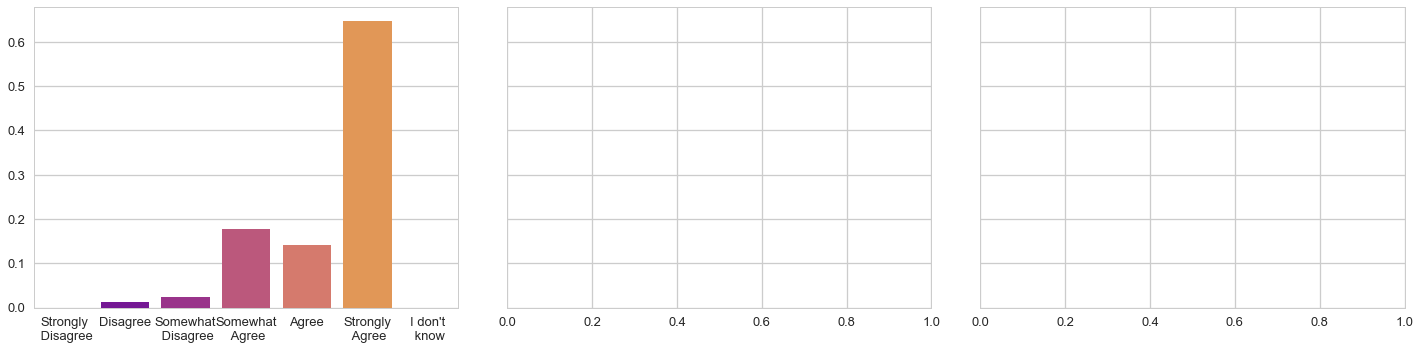

In [28]:
fig, ax = plt.subplots(1,3, figsize=(20,5), sharey=True)
plt.tight_layout(w_pad=2)
idx_labels = ["Strongly\n Disagree", "Disagree", "Somewhat\n Disagree", 
              "Somewhat\n Agree", "Agree", "Strongly\n Agree", "I don't\n know"]

sns.barplot(idx_labels, grouped.values/grouped.values.sum(), 
            ax=ax[0], palette="plasma")

## Questions To Answer

- Do participants feel that they improved during Hack Week (in data science methods, in collaboration, etc)
- Do participants feel able to do more reproducible research or believe more in reproducible research?
- Have Hack Weeks an effect on changing attitudes about reproducibility and open science?


### Which Questions are there in the Questionnaire that we can use to tackle these?

* AHW: "Rate how much you learned about statistics/machine learning/programming/sampling/visualization/big data/hacking/"
* AHW: "On average, how educational did you think the tutorials/break-outs/hacking where for you?"
* AHW: "I ended up teaching things to other people"
* AHW: "I hacked on topics, tools or methods that were new to me"
* AHW: "I believe AHW was useful for my future career"
* AHW: "I believe the skills I learned at AHW are applicable outside Academia"
* AHW: "I believe that AHW helped make me a better scientist"
* AHW: "I felt like I learned things which improve my day-to-day research"
* AHW: "I felt like I built valuable connections at AHW"
* AHW: "How helpful was AHW for these elements of your career: Meeting new collaborators"
* AHW: "How helpful was AHW for these elements of your career: Learning new technical skills"
* AHW: "I put code and/or data I created at AHW up on GitHub or another public repo"
* AHW: "I feel like AHW has made me more comfortable with doing open science"

* NHW: "Rate how much you learneda bout neuroscience/statistics/machine learning/programming/image processing/visualization/big data/cloud computing/hacking"
* NHW: "On average, how educational did you think the tutorials/break-out/etc were?"
* NHW: "I ended up teahcing things to other people"
* NHW: "I hacked on topics, tools, or methods that were new to me"
* NHW: "I believe that NeuroHackWeek was useful for my future career?"
* NHW: "I believe that I learned skills at NHW that are applicable outside Academia"
* NHW: "I believe that NeuroHackWeek has helped make me a better scientist"
* NHW: "I feel like I learned things which improve my day-to-day research"
* NHW: "I felt like I built valuable connections at NHW
* NHW: "I put code and/or data I created at NHW up on GitHub or another public repo"
* NHW: "Before NHW, most of my code & data was already on GitHUb or another public repo"
* NHW: "I feel scientists have an obligation to make their code and data public"
* NHW: "I feel like NHW has made me more comfortable with doing open science"

* GHW: "Rate how uch you think you learneda bout the following topics at GeoHackWeek: Git/Github, Docker, Python, Jupyter, Visualization, Cloud Computing, Reproducibility,"
* GHW: "On average, how educational did you feel the followingn activities and sessions were for you? Introduction, * Git/Github tutorial, Conda Tutorial, Visualization Tutorial, Reproducibility Discussion, Hack Sessions"
* GHW: "I ended up teaching things to other people"
* GHW: "I hacked on topics, tools, or methods that were very new to me"
* GHW: "I didn't personally know anyone at GeoHackWeek before I came"
* GHW: "I beleive that GHW was useful for my future career"
* GHW: "I believe that I learned skills at GHW that are applicable outside Academia"
* GHW: "I believe that GHW helped make me a better scientist"
* GHW: "I feel like I learned things which improve my day-to-day research"
* GHW: "I felt like I built valuable connections at GHW
* GHW: "I put code and/or data I created on GH or another public repo"
* GHW: "Before GHW, most of my code and data was already on GH or another public repo"
* GHW: "I feel scientists have an obligation to make their code and data public
* GHW: "I am embarrassed to put my code and data online"
* GHW: "I am afraid that if I put my code and data public, I will be scooped"
* GHW: "I feel like GHW has made me more comfortable with doing open science"



### Narratives

I think there are three narratives I can pull out of the survey: 
* learning technical skills: how much have people learned about specific technical skills at the three hack weeks, and how have these technical skills impacted their careers and day-to-day research?
* Connections + collaborations: Did participants know each other before the workshop, and have they built valuable connections at the workshop? How did they collaborate at the workshop?
* Reproducibility + open science: how many participants did open science before, and among those that didn't, what are their attitudes toward open science, and did the hack weeks change these attitudes?

### Learning Technical Skills
* "I hacked on topics, tools, or methods that were very new to me"
* "I believe that GHW helped make me a better scientist"
* "I feel like I learned things which improve my day-to-day research"
* "How helpful was attending AHW for these elements of your career? - Learning new technical skills"

In [29]:
techskills_ahw_ids = ["Q23_3", "Q24_3", "Q24_4"]

In [30]:
techskills_nhw_ids = ["Q23_3", "Q24_3", "Q24_4"]

In [31]:
techskills_ghw_ids = ["Q23_3", "Q24_3", "Q24_4"]

In [32]:
idx = ['Strongly Agree', 'Agree', 'Somewhat Agree', 
        'Somewhat Disagree', 'Disagree', "Strongly Disagree", "I don't know"]

In [33]:
techskills_233_dict = dict(zip(["Astro Hack Week", 
                               "Geo Hack Week",
                               "Neuro Hack Week"],
                              [AHWdata["Q23_3"].value_counts(),
                              GHWdata["Q23_3"].value_counts(),
                              NHWdata["Q23_3"].value_counts()]))

In [34]:
ahw_techskills_233 = AHWdata["Q23_3"].value_counts()
techskills_233_type = ["Astro Hack Week" for i in range(len(ahw_techskills_233))]
ahw_techskills_233 = pd.DataFrame(dict(zip(["Hack Week", "Counts"], [techskills_233_type, ahw_techskills_233])))
ahw_techskills_233 = ahw_techskills_233.reindex(idx)

In [35]:
ghw_techskills_233 = GHWdata["Q23_3"].value_counts()
techskills_233_type = ["Geo Hack Week" for i in range(len(ghw_techskills_233))]
ghw_techskills_233 = pd.DataFrame(dict(zip(["Hack Week", "Counts"], [techskills_233_type, ghw_techskills_233])))
ghw_techskills_233 = ghw_techskills_233.reindex(idx)

In [36]:
nhw_techskills_233 = NHWdata["Q23_3"].value_counts()
techskills_233_type = ["Neuro Hack Week" for i in range(len(nhw_techskills_233))]
nhw_techskills_233 = pd.DataFrame(dict(zip(["Hack Week", "Counts"], [techskills_233_type, nhw_techskills_233])))
nhw_techskills_233 = nhw_techskills_233.reindex(idx)

In [37]:
ahw_techskills_233.index.name = "Responses"
ghw_techskills_233.index.name = "Responses"
nhw_techskills_233.index.name = "Responses"

In [38]:
techskills_233_all = pd.concat([ahw_techskills_233, ghw_techskills_233, nhw_techskills_233])

In [39]:
techskills_233_all["Counts"] = techskills_233_all["Counts"].replace(to_replace=np.nan, value=0.0)

Text(0.5,1,'I hacked on topics, tools, \n or methods that were very new to me.')

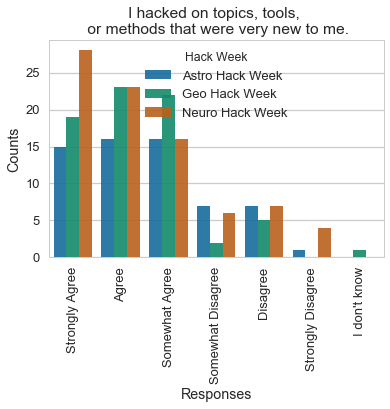

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
sns.barplot(x=techskills_233_all.index, y="Counts", data=techskills_233_all, ax=ax, hue="Hack Week", alpha=0.9)
xaxislabels = [x.get_text() for x in ax.get_xticklabels()]
ax.set_xticklabels(xaxislabels, rotation=90)
ax.set_title("I hacked on topics, tools, \n or methods that were very new to me.")


Let's tackle the next question:

Text(0.5,1,'I believe that GHW helped make me a better scientist')

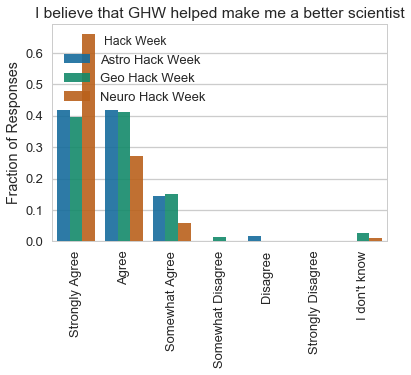

In [41]:
ahw_techskills_243 = AHWdata["Q24_3"].value_counts()
ahw_techskills_243 /= ahw_techskills_243.sum()
techskills_243_type = ["Astro Hack Week" for i in range(len(ahw_techskills_243))]
ahw_techskills_243 = pd.DataFrame(dict(zip(["Hack Week", "Counts"], [techskills_243_type, ahw_techskills_243])))
ahw_techskills_243 = ahw_techskills_243.reindex(idx)

ghw_techskills_243 = GHWdata["Q24_3"].value_counts()
ghw_techskills_243 /= ghw_techskills_243.sum()
techskills_243_type = ["Geo Hack Week" for i in range(len(ghw_techskills_243))]
ghw_techskills_243 = pd.DataFrame(dict(zip(["Hack Week", "Counts"], [techskills_243_type, ghw_techskills_243])))
ghw_techskills_243 = ghw_techskills_243.reindex(idx)

nhw_techskills_243 = NHWdata["Q24_3"].value_counts()
nhw_techskills_243 /= nhw_techskills_243.sum()
techskills_243_type = ["Neuro Hack Week" for i in range(len(nhw_techskills_243))]
nhw_techskills_243 = pd.DataFrame(dict(zip(["Hack Week", "Counts"], [techskills_243_type, nhw_techskills_243])))
nhw_techskills_243 = nhw_techskills_243.reindex(idx)

techskills_243_all = pd.concat([ahw_techskills_243, ghw_techskills_243, nhw_techskills_243])
techskills_243_all["Counts"] = techskills_243_all["Counts"].replace(to_replace=np.nan, value=0.0)

fig, ax = plt.subplots(1, 1, figsize=(6,4))
sns.barplot(x=techskills_243_all.index, y="Counts", data=techskills_243_all, ax=ax, hue="Hack Week", alpha=0.9)
xaxislabels = [x.get_text() for x in ax.get_xticklabels()]
ax.set_xticklabels(xaxislabels, rotation=90)
ax.set_ylabel("Fraction of Responses")
ax.set_title("I believe that GHW helped make me a better scientist")


Let's make a function to make the plotting easier

In [92]:
def question_barplot(q_id, title, idx, ahw_data, ghw_data, nhw_data, ax=None, palette="colorblind"):
    """
    Make a bar plot of a question.
    
    Parameters
    ----------
    q_id : iterable
        A list of question IDs for Astro, Geo and Neuro Hack Week, respectively. 
        Must be of `len(q_id) = 3`, but the IDs can be the same.
        
    title : str
        A string for the title of the plot
    
    idx : iterable
        A list with all possible question responses. Needed because sometimes not 
        all responses were used by participants of the survey
    
    ahw_data, ghw_data, nhw_data: pd.DataFrame objects
        The data frames with the survey data from AHW, GHW and NHW, respectively
    
    ax : matplotlib.Axes object, optional
        Can be used to pass an existing matplotlib.Axes object. If None, a new 
        figure object will be instantiated for the plot
    
    """
    ahw_responses = ahw_data[q_id[0]].value_counts()
    ahw_responses /= ahw_responses.sum()
    ahw_type = ["Astro Hack Week" for i in range(len(ahw_responses))]
    ahw_responses = pd.DataFrame(dict(zip(["Hack Week", "Counts"], [ahw_type, ahw_responses])))
    ahw_responses = ahw_responses.reindex(idx)

    ghw_responses = ghw_data[q_id[0]].value_counts()
    ghw_responses /= ghw_responses.sum()
    ghw_type = ["Geo Hack Week" for i in range(len(ghw_responses))]
    ghw_responses = pd.DataFrame(dict(zip(["Hack Week", "Counts"], [ghw_type, ghw_responses])))
    ghw_responses = ghw_responses.reindex(idx)

    nhw_responses = nhw_data[q_id[0]].value_counts()
    nhw_responses /= nhw_responses.sum()
    nhw_type = ["Neuro Hack Week" for i in range(len(nhw_responses))]
    nhw_responses = pd.DataFrame(dict(zip(["Hack Week", "Counts"], [nhw_type, nhw_responses])))
    nhw_responses = nhw_responses.reindex(idx)


    responses_all = pd.concat([ahw_responses, ghw_responses, nhw_responses])
    responses_all["Counts"] = responses_all["Counts"].replace(to_replace=np.nan, value=0.0)

    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(6,4))

    sns.barplot(x=responses_all.index, y="Counts", data=responses_all, ax=ax, 
                hue="Hack Week", palette=palette)
    xaxislabels = [x.get_text() for x in ax.get_xticklabels()]
    xaxislabels = ["\n".join([" ".join(x.split(" ")[:-1]), x.split(" ")[-1]]) if (len(x.split(" "))>1) else x for x in xaxislabels ]
    ax.set_xticklabels(xaxislabels, rotation=90)
    ax.set_ylabel("Fraction of Responses")
    ax.set_title(title)

    return ax    

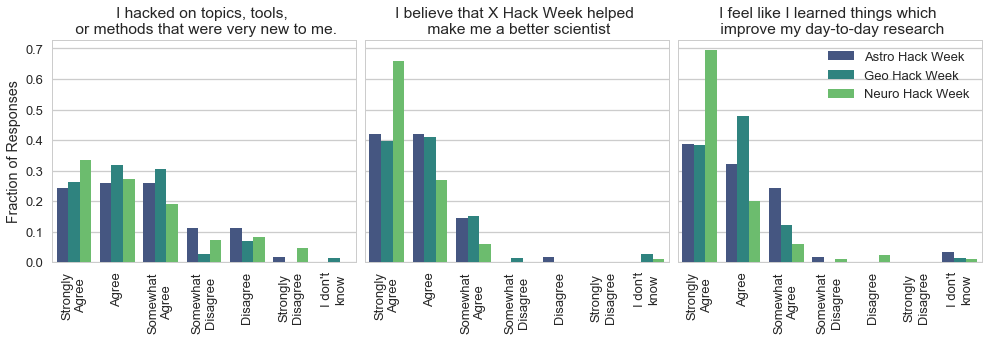

In [93]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 5), sharex=True, sharey=True)

ax1 = question_barplot(["Q23_3", "Q23_3", "Q23_3"], 
                       "I hacked on topics, tools, \n or methods that were very new to me.",
                       idx, AHWdata, GHWdata, NHWdata, ax=ax1, palette="viridis")
ax1.legend_.remove()

ax2 = question_barplot(["Q24_3", "Q24_3", "Q24_3"], 
                       "I believe that X Hack Week helped \n make me a better scientist",
                       idx, AHWdata, GHWdata, NHWdata, ax=ax2, palette="viridis")
ax2.legend_.remove()
ax2.set_ylabel("")

ax3 = question_barplot(["Q24_4", "Q24_4", "Q24_4"], 
                       "I feel like I learned things which \n improve my day-to-day research",
                       idx, AHWdata, GHWdata, NHWdata, ax=ax3, palette="viridis")
ax3.set_ylabel("")
ax3.legend(loc=1)

plt.tight_layout(w_pad=-1.0)
plt.savefig("../fig/eval_techskills.eps",  format='eps', dpi=1000)

#### "I hacked on topics, tools, \n or methods that were very new to me."

In [94]:
ahw_small = AHWdata[(AHWdata["Q23_3"] == "Agree") | 
        (AHWdata["Q23_3"] == "Strongly Agree") | 
        (AHWdata["Q23_3"] == "Somewhat Agree")]

ghw_small = GHWdata[(GHWdata["Q23_3"] == "Agree") | 
        (GHWdata["Q23_3"] == "Strongly Agree") | 
        (GHWdata["Q23_3"] == "Somewhat Agree")]

nhw_small = NHWdata[(NHWdata["Q23_3"] == "Agree") | 
        (NHWdata["Q23_3"] == "Strongly Agree") | 
        (NHWdata["Q23_3"] == "Somewhat Agree")]

In [95]:
print(len(ahw_small)/len(AHWdata["Q23_3"].dropna()))
print(len(ghw_small)/len(GHWdata["Q23_3"].dropna()))
print(len(nhw_small)/len(NHWdata["Q23_3"].dropna()))

0.7580645161290323
0.8888888888888888
0.7976190476190477


#### "I believe that X Hack Week helped \n make me a better scientist"

In [119]:
ahw_small = AHWdata[(AHWdata["Q24_3"] == "Agree") | 
        (AHWdata["Q24_3"] == "Strongly Agree") | 
        (AHWdata["Q24_3"] == "Somewhat Agree")]

ghw_small = GHWdata[(GHWdata["Q24_3"] == "Agree") | 
        (GHWdata["Q24_3"] == "Strongly Agree") | 
        (GHWdata["Q24_3"] == "Somewhat Agree")]

nhw_small = NHWdata[(NHWdata["Q24_3"] == "Agree") | 
        (NHWdata["Q24_3"] == "Strongly Agree") | 
        (NHWdata["Q24_3"] == "Somewhat Agree")]

In [120]:
print(len(ahw_small)/len(AHWdata["Q24_3"].dropna()))
print(len(ghw_small)/len(GHWdata["Q24_3"].dropna()))
print(len(nhw_small)/len(NHWdata["Q24_3"].dropna()))

0.9838709677419355
0.958904109589041
0.9882352941176471


#### "I feel like I learned things which \n improve my day-to-day research"

In [121]:
ahw_small = AHWdata[(AHWdata["Q24_4"] == "Agree") | 
        (AHWdata["Q24_4"] == "Strongly Agree") | 
        (AHWdata["Q24_4"] == "Somewhat Agree")]

ghw_small = GHWdata[(GHWdata["Q24_4"] == "Agree") | 
        (GHWdata["Q24_4"] == "Strongly Agree") | 
        (GHWdata["Q24_4"] == "Somewhat Agree")]

nhw_small = NHWdata[(NHWdata["Q24_4"] == "Agree") | 
        (NHWdata["Q24_4"] == "Strongly Agree") | 
        (NHWdata["Q24_4"] == "Somewhat Agree")]

In [122]:
print(len(ahw_small)/len(AHWdata["Q24_4"].dropna()))
print(len(ghw_small)/len(GHWdata["Q24_4"].dropna()))
print(len(nhw_small)/len(NHWdata["Q24_4"].dropna()))

0.9516129032258065
0.9863013698630136
0.9529411764705882


### Collaboration

Let's look at some questions that encode collaborations:

* "I ended up teaching things to other people"
* "I felt like my contributions to my hack team(s) were valued"
* "I felt like I built valuable connections at GHW"


In [100]:
q_ind1 = ["Q23_2", "Q23_2", "Q23_2"]
title1 = "I ended up teaching \n things to other people"
q_ind2 = ["Q19_5", "Q19_5", "Q19_5"]
title2 = "I felt like my contributions to \n my hack team(s) were valued"
q_ind3 = ["Q24_5", "Q24_5", "Q24_5"]
title3 = "I felt like I built valuable \n connections at X Hack Week"

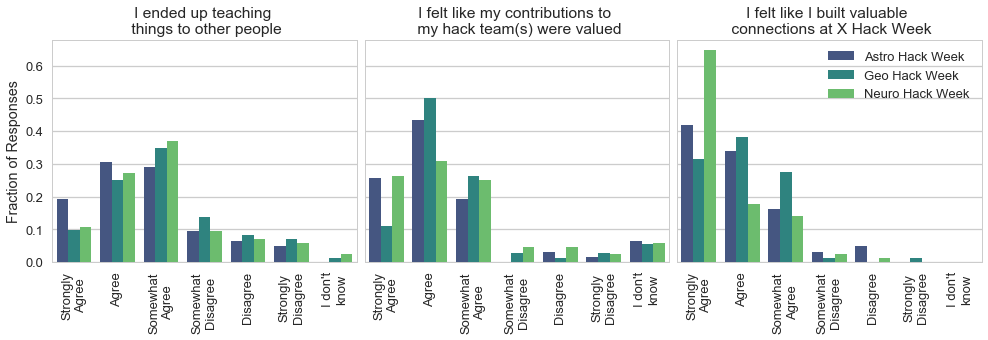

In [101]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 5), sharex=True, sharey=True)

ax1 = question_barplot(q_ind1, title1, 
                       idx, AHWdata, GHWdata, NHWdata, ax=ax1, palette="viridis")
ax1.legend_.remove()

ax2 = question_barplot(q_ind2, title2,
                       idx, AHWdata, GHWdata, NHWdata, ax=ax2, palette="viridis")
ax2.legend_.remove()
ax2.set_ylabel("")

ax3 = question_barplot(q_ind3, title3,
                       idx, AHWdata, GHWdata, NHWdata, ax=ax3, palette="viridis")

ax3.legend(loc=1)
ax3.set_ylabel("")


plt.tight_layout(w_pad=0.5)
plt.savefig("../fig/eval_collab.eps", format='eps', dpi=1000)

Let's look at different levels of engagement:

In [125]:
def _plot_categorical(df, xlabel, ylabel, x_keys, y_keys, prefac, ax, cmap, s):
    """
    Plot two categorical variables against each other in a bubble plot.

    Parameters
    ----------
    df : pd.DataFrame
        A pandas DataFrame with the data

    xlabel : str
        The column name for the variable on the x-axis

    ylabel : str
        The column name for the variable on the y-axis

    x_keys : iterable
        A list containing the different categories in df[xlabel]

    y_keys: iterable
        A list containing the different categories in df[ylabel]

    prefac : float
        A pre-factor steering the shading of the bubbles

    ax : matplotlib.Axes object
        The matplotlib.Axes object to plot the bubble plot into

    cmap : matplotlib.cm.colormap
        A matplotlib colormap to use for shading the bubbles

    s : float
        A pre-factor changing the overall size of the bubbles

    Returns
    -------
    ax : matplotlib.Axes object
        The same matplotlib.Axes object for further manipulation

    """
    tuples, counts = [], []
    for i in range(len(x_keys)):
        for j in range(len(y_keys)):
            tuples.append((i,j))

            counts.append(len(df[(df[xlabel] == x_keys[i]) &
                                 (df[ylabel] == y_keys[j])]))

    x, y = zip(*tuples)

    cmap = plt.cm.get_cmap(cmap)
    sizes = (np.array(counts)/np.sum(counts))

    ax.scatter(x, y, s=s*1000*sizes, marker='o', linewidths=1, edgecolor='black',
                c=cmap(prefac*sizes/(np.max(sizes)-np.min(sizes))), alpha=0.7)

    ax.set_xticks(np.arange(len(x_keys)))
    ax.set_xticklabels(x_keys)
    ax.set_xlim(np.min(x)-1, np.max(x)+1)
    ax.set_xlabel(xlabel)

    ax.set_yticks(np.arange(len(y_keys)))
    ax.set_yticklabels(y_keys)
    ax.set_ylim(np.min(y)-1, np.max(y)+1)
    ax.set_ylabel(ylabel)

    return ax


In [126]:
AHWquestions2016

Q49                                                                                                                                                                       How did you first hear about AstroHackWeek?
Q21                                                                                                                                                            In one sentence, describe what you think “hack” means.
Q39                                                                                                                                            Approximately how many different hack projects did you work on at AHW?
Q7_1                                                                                                                                   Rate your knowledge about the following areas BEFORE AstroHackWeek - Astronomy
Q7_2                                                                                                                                  Rate your 

In [134]:
AHWdata["Q3"].value_counts().keys()

Index(['Ph.D student', 'Post-doc', 'Masters student', 'Undergrad student',
       'Research staff', 'Freelancer / contract worker',
       'Other (please state)', 'Tenured faculty',
       'Junior faculty / tenure track', 'Unemployed'],
      dtype='object')

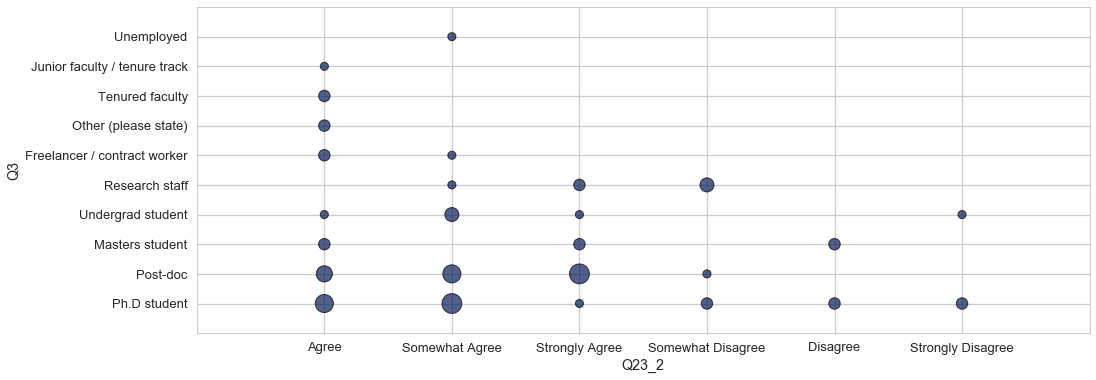

In [143]:
fig, ax = plt.subplots(1, 1, figsize=(16,6))
_plot_categorical(AHWdata, "Q23_2", "Q3", 
                  AHWdata["Q23_2"].value_counts().keys(), AHWdata["Q3"].value_counts().keys(), 
                  prefac=10, ax=ax, cmap="YlGnBu", s=4)

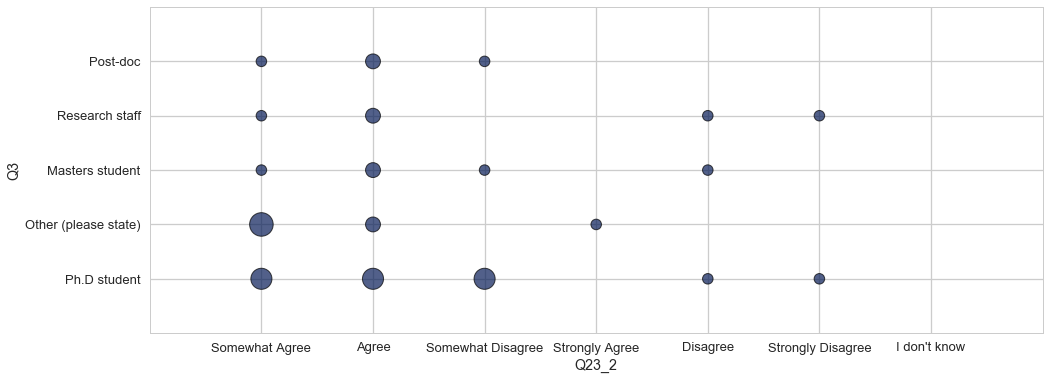

In [142]:
fig, ax = plt.subplots(1, 1, figsize=(16,6))
_plot_categorical(GHWdata, "Q23_2", "Q3", 
                  GHWdata["Q23_2"].value_counts().keys(), GHWdata["Q3"].value_counts().keys(), 
                  prefac=10, ax=ax, cmap="YlGnBu", s=4)

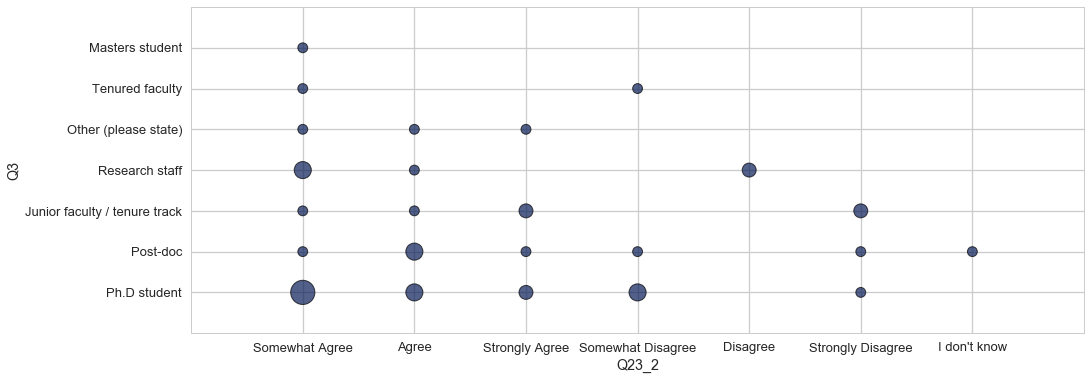

In [144]:
fig, ax = plt.subplots(1, 1, figsize=(16,6))
_plot_categorical(NHWdata, "Q23_2", "Q3", 
                  NHWdata["Q23_2"].value_counts().keys(), NHWdata["Q3"].value_counts().keys(), 
                  prefac=10, ax=ax, cmap="YlGnBu", s=4)

In [124]:
AHWdata["Q23_2"].value_counts()

Agree                19
Somewhat Agree       18
Strongly Agree       12
Somewhat Disagree     6
Disagree              4
Strongly Disagree     3
Name: Q23_2, dtype: int64

In [ ]:
tuples, counts = [], []
for i in range(len(x_keys)):
    for j in range(len(y_keys)):
        tuples.append((i,j))

        counts.append(len(df[(df[xlabel] == x_keys[i]) &
                             (df[ylabel] == y_keys[j])]))

x, y = zip(*tuples)

cmap = plt.cm.get_cmap(cmap)
sizes = (np.array(counts)/np.sum(counts))

ax.scatter(x, y, s=s*1000*sizes, marker='o', linewidths=1, edgecolor='black',
            c=cmap(prefac*sizes/(np.max(sizes)-np.min(sizes))), alpha=0.7)

ax.set_xticks(np.arange(len(x_keys)))
ax.set_xticklabels(x_keys)
ax.set_xlim(np.min(x)-1, np.max(x)+1)
ax.set_xlabel(xlabel)

ax.set_yticks(np.arange(len(y_keys)))
ax.set_yticklabels(y_keys)
ax.set_ylim(np.min(y)-1, np.max(y)+1)
ax.set_ylabel(ylabel)

return ax


In [102]:
ahw_small = AHWdata[(AHWdata["Q24_5"] == "Agree") | 
        (AHWdata["Q24_5"] == "Strongly Agree") | 
        (AHWdata["Q24_5"] == "Somewhat Agree")]

ghw_small = GHWdata[(GHWdata["Q24_5"] == "Agree") | 
        (GHWdata["Q24_5"] == "Strongly Agree") | 
        (GHWdata["Q24_5"] == "Somewhat Agree")]

nhw_small = NHWdata[(NHWdata["Q24_5"] == "Agree") | 
        (NHWdata["Q24_5"] == "Strongly Agree") | 
        (NHWdata["Q24_5"] == "Somewhat Agree")]

In [145]:
print(len(ahw_small)/len(AHWdata["Q24_5"].dropna()))
print(len(ghw_small)/len(GHWdata["Q24_5"].dropna()))
print(len(nhw_small)/len(NHWdata["Q24_5"].dropna()))

0.9516129032258065
0.9863013698630136
0.9529411764705882


In [103]:
nhw_small["Q24_5"].value_counts()/len(nhw_small["Q24_5"].dropna())

Strongly Agree    0.670732
Agree             0.182927
Somewhat Agree    0.146341
Name: Q24_5, dtype: float64

In [147]:
ahw_small = AHWdata[(AHWdata["Q23_2"] == "Agree") | 
        (AHWdata["Q23_2"] == "Strongly Agree") | 
        (AHWdata["Q23_2"] == "Somewhat Agree")]

ghw_small = GHWdata[(GHWdata["Q23_2"] == "Agree") | 
        (GHWdata["Q23_2"] == "Strongly Agree") | 
        (GHWdata["Q23_2"] == "Somewhat Agree")]

nhw_small = NHWdata[(NHWdata["Q23_2"] == "Agree") | 
        (NHWdata["Q23_2"] == "Strongly Agree") | 
        (NHWdata["Q23_2"] == "Somewhat Agree")]

In [148]:
print(len(ahw_small)/len(AHWdata["Q23_2"].dropna()))
print(len(ghw_small)/len(GHWdata["Q23_2"].dropna()))
print(len(nhw_small)/len(NHWdata["Q23_2"].dropna()))

0.7903225806451613
0.6944444444444444
0.75


### Reproducibility + Open Science

* "I put code and/or data I created on GH or another public repo"
* "Before GHW, most of my code and data was already on GH or another public repo"
* "I feel scientists have an obligation to make their code and data public
* "I am embarrassed to put my code and data online"
* "I am afraid that if I put my code and data public, I will be scooped"
* "I feel like GHW has made me more comfortable with doing open science"

This is a bit more complicated, because some of these depend on each other.

Let's start with plotting the first three questions:

In [149]:
q_ind1 = ["Q38_1", "Q38_1", "Q38_1"]
title1 = "I put code and/or data I created at X Hack \n Week up on GitHub or another public repository"
q_ind2 = ["Q38_2", "Q38_2", "Q38_2"]
title2 = "Before X Hack Week, most of my code & data was\n already on GitHub or another public repository"
q_ind3 = ["Q38_6", "Q38_6", "Q38_6"]
title3 = "I feel like X Hack Week has made me \n more comfortable with doing open science"

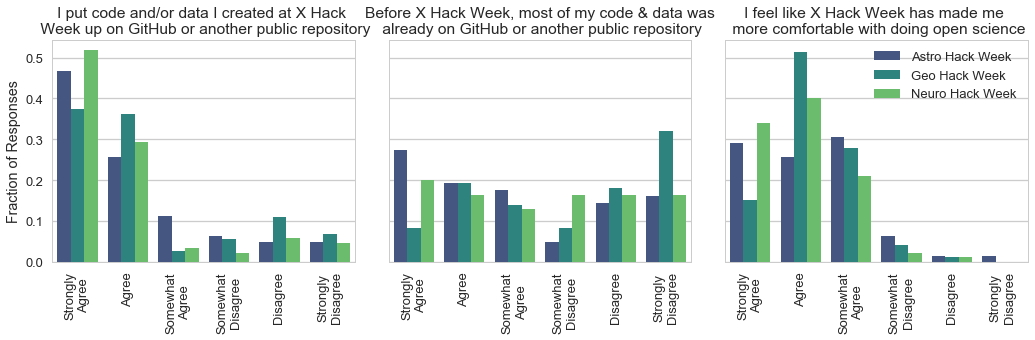

In [150]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)

ax1 = question_barplot(q_ind1, title1, 
                       idx[:-1], AHWdata, GHWdata, NHWdata, ax=ax1, palette="viridis")
ax1.legend_.remove()

ax2 = question_barplot(q_ind2, title2,
                       idx[:-1], AHWdata, GHWdata, NHWdata, ax=ax2, palette="viridis")
ax2.legend_.remove()
ax2.set_ylabel("")

ax3 = question_barplot(q_ind3, title3,
                       idx[:-1], AHWdata, GHWdata, NHWdata, ax=ax3, palette="viridis")

ax3.legend(loc=1)
ax3.set_ylabel("")


plt.tight_layout(w_pad=-4)
plt.savefig("../fig/eval_openscience.eps", format='eps', dpi=1000)

#### "I put code and/or data I created at X Hack \n Week up on GitHub or another public repository"

In [158]:
ahw_small = AHWdata[(AHWdata["Q38_1"] == "Agree") | 
        (AHWdata["Q38_1"] == "Strongly Agree") | 
        (AHWdata["Q38_1"] == "Somewhat Agree")]

ghw_small = GHWdata[(GHWdata["Q38_1"] == "Agree") | 
        (GHWdata["Q38_1"] == "Strongly Agree") | 
        (GHWdata["Q38_1"] == "Somewhat Agree")]

nhw_small = NHWdata[(NHWdata["Q38_1"] == "Agree") | 
        (NHWdata["Q38_1"] == "Strongly Agree") | 
        (NHWdata["Q38_1"] == "Somewhat Agree")]

print(len(ahw_small)/len(AHWdata["Q38_1"].dropna()))
print(len(ghw_small)/len(GHWdata["Q38_1"].dropna()))
print(len(nhw_small)/len(NHWdata["Q38_1"].dropna()))

0.8387096774193549
0.7638888888888888
0.8470588235294118


#### "Before X Hack Week, most of my code & data was\n already on GitHub or another public repository"

In [109]:
ahw_small = AHWdata[(AHWdata["Q38_2"] == "Agree") | 
        (AHWdata["Q38_2"] == "Strongly Agree") | 
        (AHWdata["Q38_2"] == "Somewhat Agree")]

ghw_small = GHWdata[(GHWdata["Q38_2"] == "Agree") | 
        (GHWdata["Q38_2"] == "Strongly Agree") | 
        (GHWdata["Q38_2"] == "Somewhat Agree")]

nhw_small = NHWdata[(NHWdata["Q38_2"] == "Agree") | 
        (NHWdata["Q38_2"] == "Strongly Agree") | 
        (NHWdata["Q38_2"] == "Somewhat Agree")]

print(len(ahw_small)/len(AHWdata["Q38_2"].dropna()))
print(len(ghw_small)/len(GHWdata["Q38_2"].dropna()))
print(len(nhw_small)/len(NHWdata["Q38_2"].dropna()))

0.6451612903225806
0.4166666666666667
0.49411764705882355


#### "I feel like X Hack Week has made me \n more comfortable with doing open science"

In [159]:
ahw_small = AHWdata[(AHWdata["Q38_6"] == "Agree") | 
        (AHWdata["Q38_6"] == "Strongly Agree") | 
        (AHWdata["Q38_6"] == "Somewhat Agree")]

ghw_small = GHWdata[(GHWdata["Q38_6"] == "Agree") | 
        (GHWdata["Q38_6"] == "Strongly Agree") | 
        (GHWdata["Q38_6"] == "Somewhat Agree")]

nhw_small = NHWdata[(NHWdata["Q38_6"] == "Agree") | 
        (NHWdata["Q38_6"] == "Strongly Agree") | 
        (NHWdata["Q38_6"] == "Somewhat Agree")]

print(len(ahw_small)/len(AHWdata["Q38_6"].dropna()))
print(len(ghw_small)/len(GHWdata["Q38_6"].dropna()))
print(len(nhw_small)/len(NHWdata["Q38_6"].dropna()))

0.8548387096774194
0.9444444444444444
0.9529411764705882


In [155]:
GHWdata["Q38_2"].value_counts()

Strongly Disagree    23
Agree                14
Disagree             13
Somewhat Agree       10
Strongly Agree        6
Somewhat Disagree     6
Name: Q38_2, dtype: int64

In [156]:
GHWdata2016["Q38_2"].value_counts()

Strongly Disagree    12
Disagree             10
Agree                 8
Somewhat Agree        4
Somewhat Disagree     2
Name: Q38_2, dtype: int64

In [ ]:
GHWdata2016["Q38_2"].value_counts()

### How many of those who did not put most of their code online before the hack week put code and/or data online at the hack week?

* "I am embarrassed to put my code and data online"
* "I am afraid that if I put my code and data public, I will be scooped"
* "I feel like GHW has made me more comfortable with doing open science"

In [111]:
q_ind1 = ["Q38_4", "Q38_4", "Q38_4"]
title1 = "I am embarrassed to put my code & data online"
q_ind2 = ["Q38_5", "Q38_5", "Q38_5"]
title2 = "I am afraid that if I put my \n code & data public, I will be scooped"
q_ind3 = ["Q38_3", "Q38_3", "Q38_3"]
title3 = "I feel scientists have an \n obligation to make their code & data public"

In [112]:
ahw_small = AHWdata[(AHWdata["Q38_2"] == "Disagree") | 
        (AHWdata["Q38_2"] == "Strongly Disagree") | 
        (AHWdata["Q38_2"] == "Somewhat Disgree")]

ghw_small = GHWdata[(GHWdata["Q38_2"] == "Disagree") | 
        (GHWdata["Q38_2"] == "Strongly Disagree") | 
        (GHWdata["Q38_2"] == "Somewhat Disgree")]

nhw_small = NHWdata[(NHWdata["Q38_2"] == "Disagree") | 
        (NHWdata["Q38_2"] == "Strongly Disagree") | 
        (NHWdata["Q38_2"] == "Somewhat Disgree")]

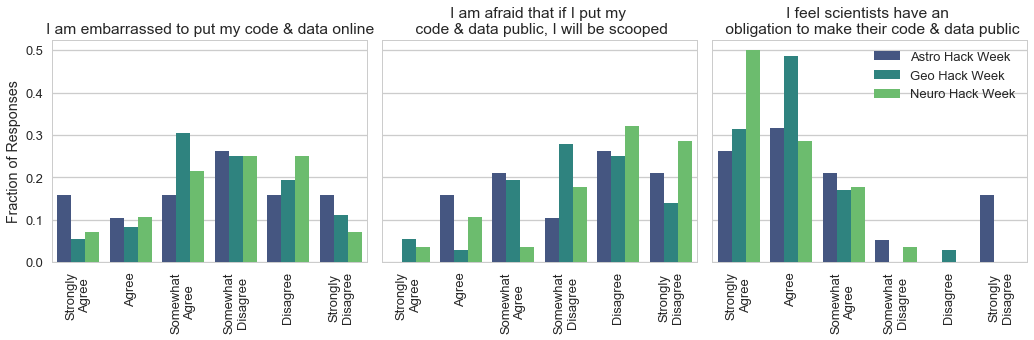

In [113]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)

ax1 = question_barplot(q_ind1, title1, 
                       idx[:-1], ahw_small, ghw_small, nhw_small, ax=ax1, palette="viridis")
ax1.legend_.remove()

ax2 = question_barplot(q_ind2, title2,
                       idx[:-1], ahw_small, ghw_small, nhw_small, ax=ax2, palette="viridis")
ax2.legend_.remove()
ax2.set_ylabel("")

ax3 = question_barplot(q_ind3, title3,
                       idx[:-1], ahw_small, ghw_small, nhw_small, ax=ax3, palette="viridis")

ax3.legend(loc=1)
ax3.set_ylabel("")


plt.tight_layout(w_pad=-2)
plt.savefig("../fig/eval_new_open_science.eps",  format='eps', dpi=1000)

Let's compare this to all participants:

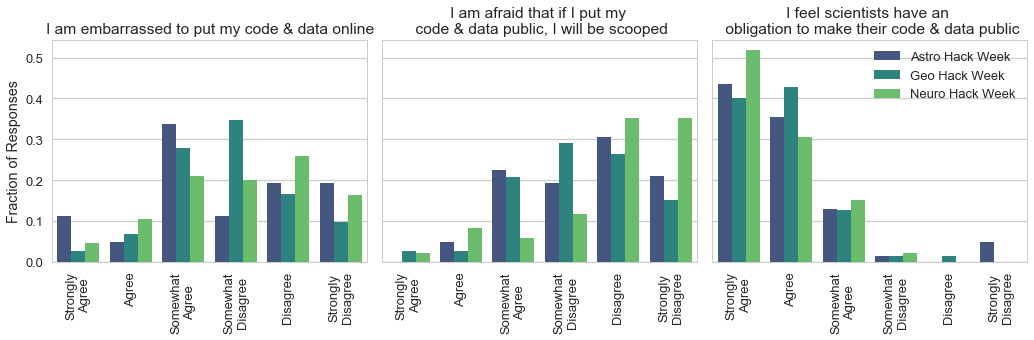

In [114]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)

ax1 = question_barplot(q_ind1, title1, 
                       idx[:-1], AHWdata, GHWdata, NHWdata,  ax=ax1, palette="viridis")
ax1.legend_.remove()

ax2 = question_barplot(q_ind2, title2,
                       idx[:-1], AHWdata, GHWdata, NHWdata, ax=ax2, palette="viridis")
ax2.legend_.remove()
ax2.set_ylabel("")

ax3 = question_barplot(q_ind3, title3,
                       idx[:-1], AHWdata, GHWdata, NHWdata, ax=ax3, palette="viridis")

ax3.legend(loc=1)
ax3.set_ylabel("")


plt.tight_layout(w_pad=-2)
plt.savefig("../fig/eval_new_open_science_all.eps",  format='eps', dpi=1000)

The Astro Hack Week surveys are not 100% filled out. So let's check how they compare to the set of participants to look for any systematics:

In [115]:
AHWdata2016["Q3"].value_counts()/AHWdata2016["Q3"].count()

Ph.D student                    0.321429
Post-doc                        0.250000
Research staff                  0.142857
Masters student                 0.107143
Freelancer / contract worker    0.071429
Other (please state)            0.071429
Tenured faculty                 0.035714
Name: Q3, dtype: float64

In [116]:
AHWquestions2017

Q49                                                                                                                                                                    How did you first hear about AstroHackWeek?
Q21                                                                                                                                                         In one sentence, describe what you think “hack” means.
Q39                                                                                                                                         Approximately how many different hack projects did you work on at AHW?
Q7_1                                                                                                                                Rate your knowledge about the following areas BEFORE AstroHackWeek - Astronomy
Q7_2                                                                                                                               Rate your knowledge about

In [117]:
AHWdata2017["Q3"].value_counts()/AHWdata2017["Q3"].count()

Post-doc                         0.272727
Ph.D student                     0.272727
Undergrad student                0.181818
Masters student                  0.090909
Research staff                   0.060606
Freelancer / contract worker     0.030303
Tenured faculty                  0.030303
Junior faculty / tenure track    0.030303
Unemployed                       0.030303
Name: Q3, dtype: float64

In [118]:
AHWdata2017["Q3"].count()

33